In [3]:
!pip install xgboost

In [4]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv("Iris.csv")

In [17]:
df.sample(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
27,28,5.2,3.5,1.5,0.2,Iris-setosa
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
120,121,6.9,3.2,5.7,2.3,Iris-virginica


In [19]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [23]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<Axes: >

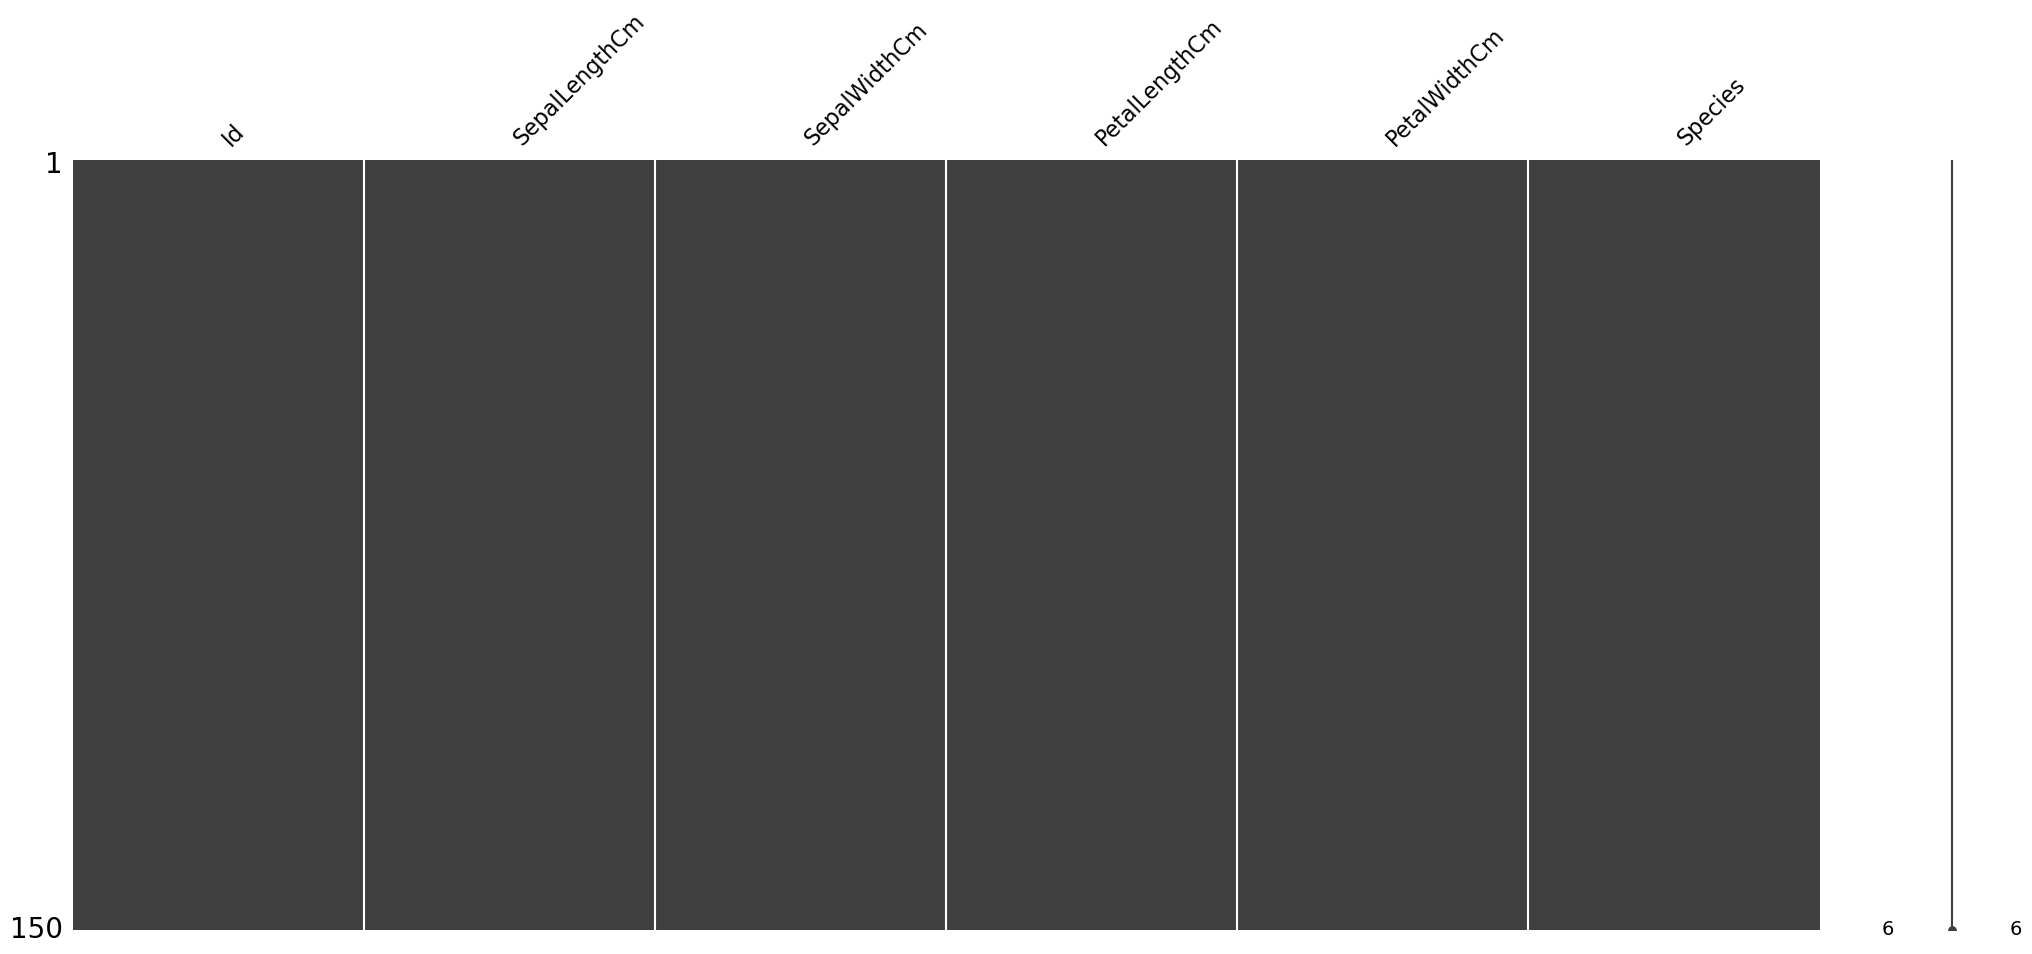

In [25]:
msno.matrix(df)

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

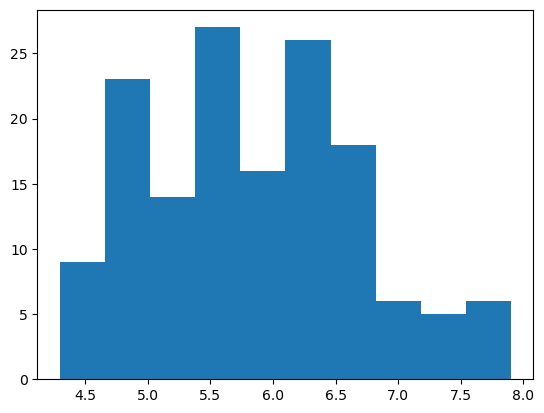

In [26]:
plt.hist(df['SepalLengthCm'])

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

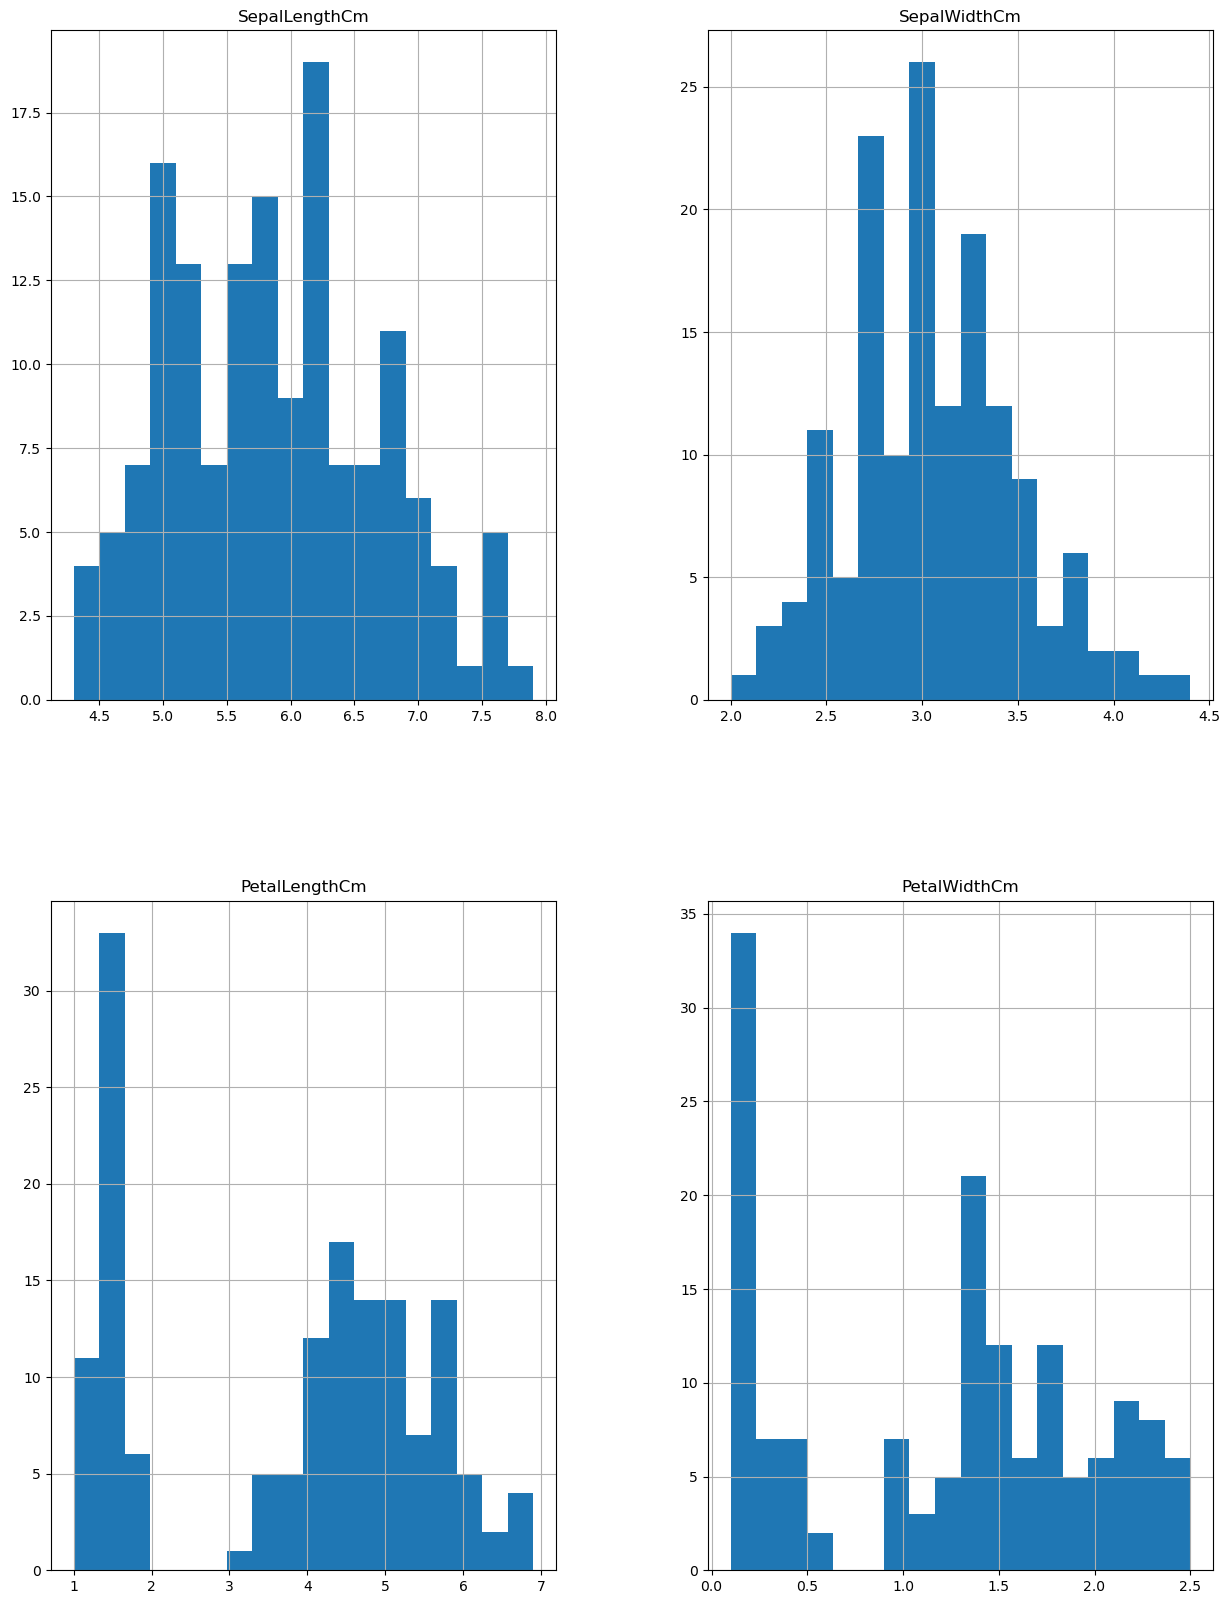

In [29]:
df = df.drop(columns='Id')
df.hist(bins=18, figsize=(15,20))

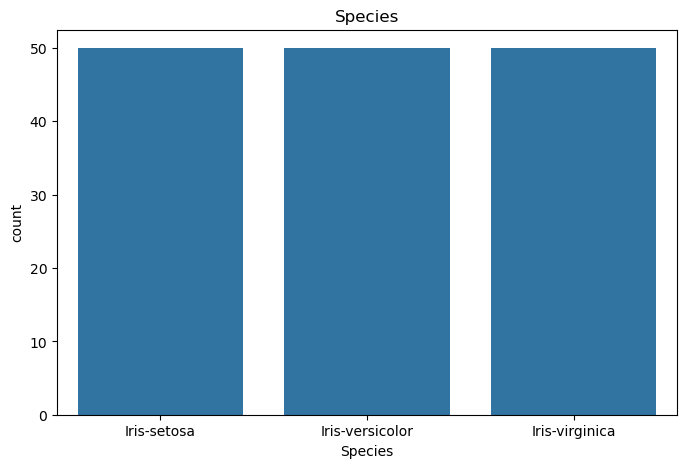

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Species', data=df)
plt.title('Species')
plt.show()

In [33]:
target = 'Species'
X = df.drop([target],axis=1)
Y = df[target]

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [47]:
X_train.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,120.000000,120.000000,120.000000,120.00000
mean,5.790000,3.054167,3.635833,1.15750
std,0.821906,0.436352,1.755940,0.76627
min,4.300000,2.000000,1.000000,0.10000
25%,5.100000,2.800000,1.500000,0.30000
50%,5.700000,3.000000,4.150000,1.30000
75%,6.400000,3.325000,5.100000,1.80000
max,7.700000,4.400000,6.900000,2.50000


In [128]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train_normalized = scaler.fit_transform(X_train)
# X_test_normalized = scaler.transform(X_test)

In [158]:
model = KNeighborsClassifier()
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [160]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2,
       2, 2, 0, 1, 0, 0, 2, 0])

In [162]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.80      0.89        10
           2       0.87      1.00      0.93        13

    accuracy                           0.93        30
   macro avg       0.96      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30



In [146]:
model = GaussianNB()

In [148]:
model.fit(X_train,Y_train)

GaussianNB()

In [150]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2,
       1, 2, 0, 1, 0, 0, 2, 0])

In [152]:
from sklearn.metrics import accuracy_score,f1_score
print(accuracy_score(Y_test,y_pred))

0.9666666666666667


In [154]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [83]:
from xgboost import XGBClassifier

In [85]:
enc = LabelEncoder()
Y_train = enc.fit_transform(Y_train)
Y_test = enc.transform(Y_test)

In [87]:
model = XGBClassifier(learning_rate=0.1)

In [89]:
model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [91]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2,
       1, 2, 0, 1, 0, 0, 2, 0], dtype=int64)

In [93]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [106]:
model = LogisticRegression()

In [108]:
model.fit(X_train_standardized,Y_train)

LogisticRegression()

In [112]:
y_pred = model.predict(X_test_standardized)

In [114]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

